In [1]:
import pandas as pd
data = pd.read_csv("btcusdt15m_150622.csv")
data.head()

,Unnamed: 0,EMA,CMO,MINUSDM,PLUSDM,CLOSE,CLOSEL1,CLOSEL2,CLOSEL3,3O,CMB,UP_DOWN
0,20,21701.212405,-30.354869,1350.891500,601.872500,21187.86,20893.15,21098.26,21226.31,0,0,0
1,21,21624.254080,-38.159406,1524.386925,571.778875,20893.15,21098.26,21226.31,21167.46,0,0,1
2,22,21574.159406,-27.677526,1548.567579,543.189931,21098.26,21226.31,21167.46,21099.35,0,0,1
3,23,21541.030891,-21.614183,1471.139200,603.490435,21226.31,21167.46,21099.35,21277.03,0,0,0
4,24,21505.452711,-23.374593,1397.582240,635.605913,21167.46,21099.35,21277.03,21336.00,0,0,0


In [2]:
predictors = ["CMO","MINUSDM", "PLUSDM", "CLOSE", "3O", "CMB"]

X = data[predictors]
y = data.UP_DOWN

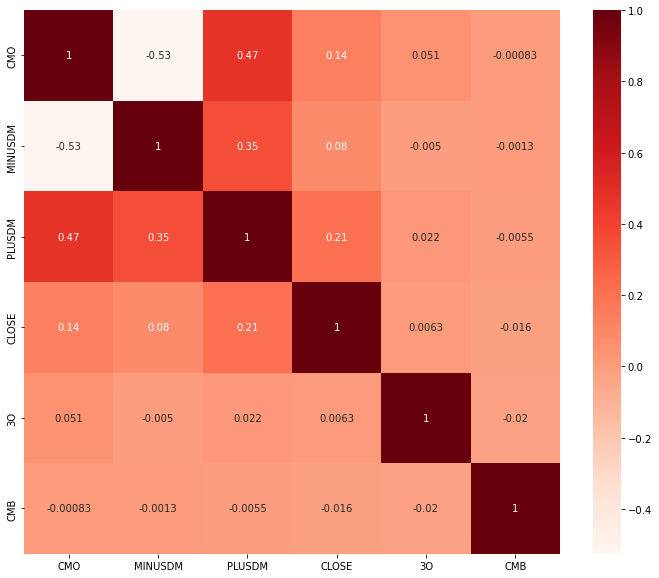

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data[predictors].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test.head()

,CMO,MINUSDM,PLUSDM,CLOSE,3O,CMB
5780,7.078387,337.577285,446.013246,24715.95,0,0
11416,4.135055,149.716177,156.978358,19074.57,0,0
3006,-6.540134,238.418630,196.698699,20624.70,0,0
9468,-7.436191,1152.138527,1099.139625,19030.13,0,0
316,-26.256294,1166.341908,550.108721,19212.77,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[predictors[0:-2]]) 

X_train[predictors[0:-2]] = scaler.transform(X_train[predictors[0:-2]])

X_test[predictors[0:-2]] = scaler.transform(X_test[predictors[0:-2]])
X_test.head()

,CMO,MINUSDM,PLUSDM,CLOSE,3O,CMB
5780,0.394396,-0.275422,0.159965,2.385321,0,0
11416,0.243305,-1.079268,-0.904953,-1.074384,0,0
3006,-0.304686,-0.699716,-0.758608,-0.123732,0,0
9468,-0.350684,3.210033,2.566341,-1.101638,0,0
316,-1.316779,3.270808,0.543494,-0.989630,0,0


In [6]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=1)
svm.fit(X_train, y_train)

# fit the model with data
y_pred = svm.predict(X_test)

In [7]:
from sklearn import metrics
from sklearn.metrics import classification_report

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
PU = cnf_matrix[1][1]
P = cnf_matrix[1][0] + cnf_matrix[1][1]
print(cnf_matrix)
print(PU/P)
print(classification_report(y_test, y_pred))

[[647 621]
 [548 706]]
0.5629984051036683
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      1268
           1       0.53      0.56      0.55      1254

    accuracy                           0.54      2522
   macro avg       0.54      0.54      0.54      2522
weighted avg       0.54      0.54      0.54      2522



In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([4.05595999, 3.98986938, 3.89846911, 4.68484035]),
 'std_fit_time': array([0.09497791, 0.05599858, 0.07729455, 0.11158505]),
 'mean_score_time': array([0.44309683, 0.42389531, 0.4238445 , 0.41743498]),
 'std_score_time': array([0.01434057, 0.00867469, 0.01424933, 0.01664277]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.51040634, 0.51635282, 0.51437066, 0.52329039]),
 'split1_test_score': array([0.55599604, 0.53221011, 0.53914767, 0.53815659]),
 'split2_test_score': array([0.51635282, 0.5173439 , 0.50545094, 0.52031715]),
 'split3_test_score': array([0.53518335, 0.53518335, 0.54311199, 0.54608523]),
 'split4_test_score': array([0.52824579, 0.53022795, 0.54707631, 0.53815659]),
 'split5_test_score': array([0.55203171, 0.56095144, 0.55599604, 0.54311199]),
 'split6_test_